Created directory: visualizations

## 1. Data Structure Examination ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Subject    2191 non-null   object        
 1   body       2191 non-null   object        
 2   date       2191 non-null   datetime64[ns]
 3   from       2191 non-null   object        
 4   sentiment  2191 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 85.7+ KB

Summary Statistics:
             Subject   body                           date  \
count           2191   2191                           2191   
unique          1251   1539                            NaN   
top     (No Subject)  \n\n                             NaN   
freq             141     21                            NaN   
mean             NaN    NaN  2010-12-31 02:17:21.716111360   
min              NaN    NaN            20

C:\Users\Admin\AppData\Local\Temp\ipykernel_1764\3942224263.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_dist.index, y=sentiment_dist.values, palette='viridis', order=['Positive', 'Neutral', 'Negative'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_1764\3942224263.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time_indexed['sentiment'].resample('M').count().plot(kind='line', marker='o')


-> Saved 'visualizations/email_volume_over_time.png'


C:\Users\Admin\AppData\Local\Temp\ipykernel_1764\3942224263.py:56: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_over_time = df_time_indexed.groupby([pd.Grouper(freq='M'), 'sentiment']).size().unstack(fill_value=0)


-> Saved 'visualizations/sentiment_trends_over_time.png'
--------------------------------------------------

## 4. Analysis of Top Senders ##
from
lydia.delgado@enron.com        284
john.arnold@enron.com          256
sally.beck@enron.com           227
patti.thompson@enron.com       225
bobette.riner@ipgdirect.com    217
don.baughman@enron.com         213
johnny.palmer@enron.com        213
eric.bass@enron.com            210
kayne.coulter@enron.com        174
rhonda.denton@enron.com        172
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_1764\3942224263.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_senders.index, x=top_10_senders.values, palette='mako', orient='h')



-> Saved 'visualizations/top_senders.png'
-> Saved 'visualizations/top_senders_sentiment.png'
--------------------------------------------------


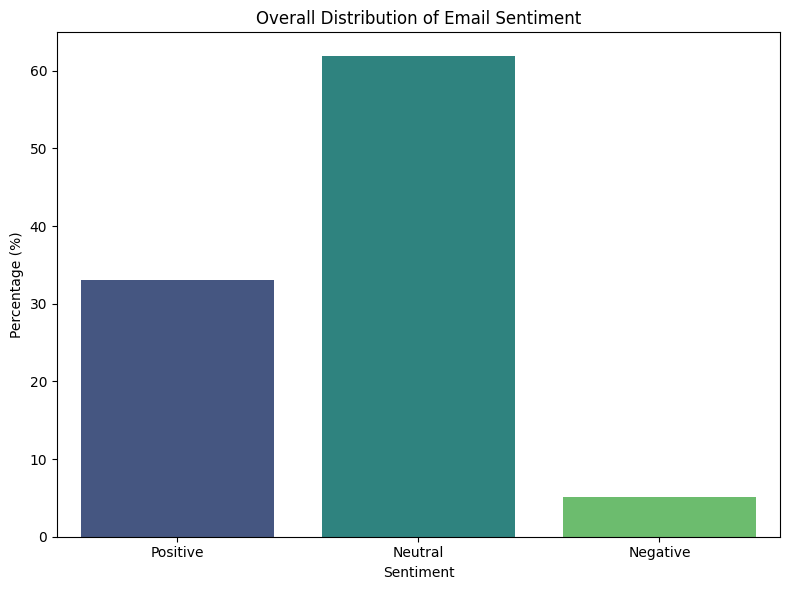

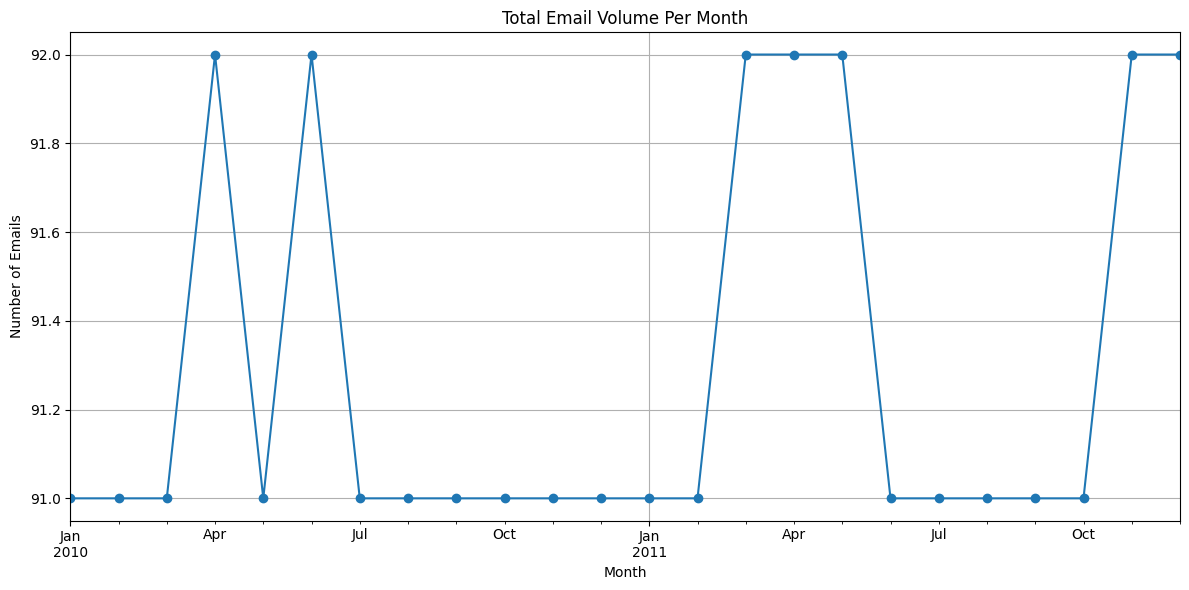

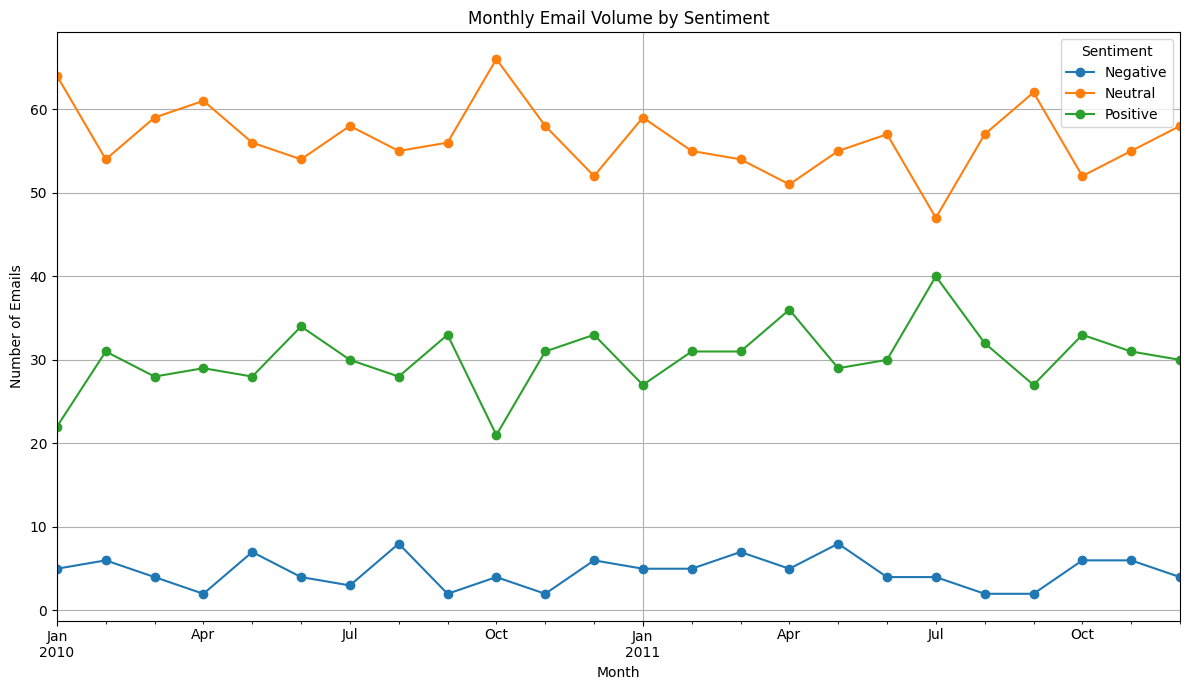

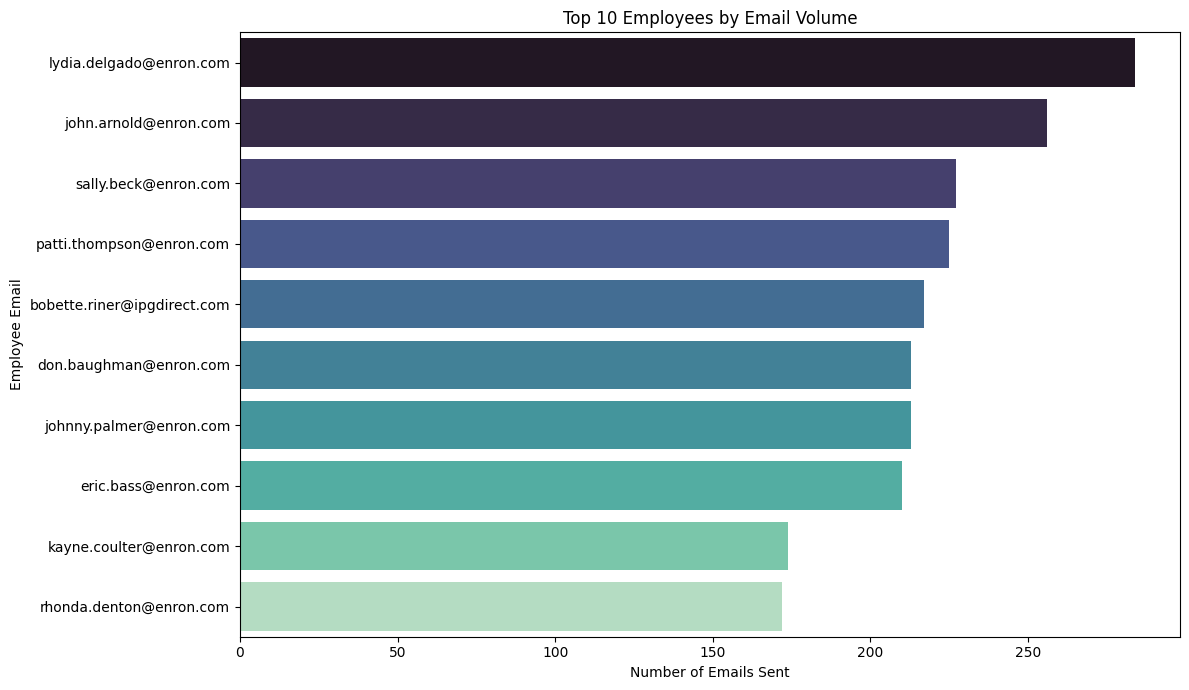

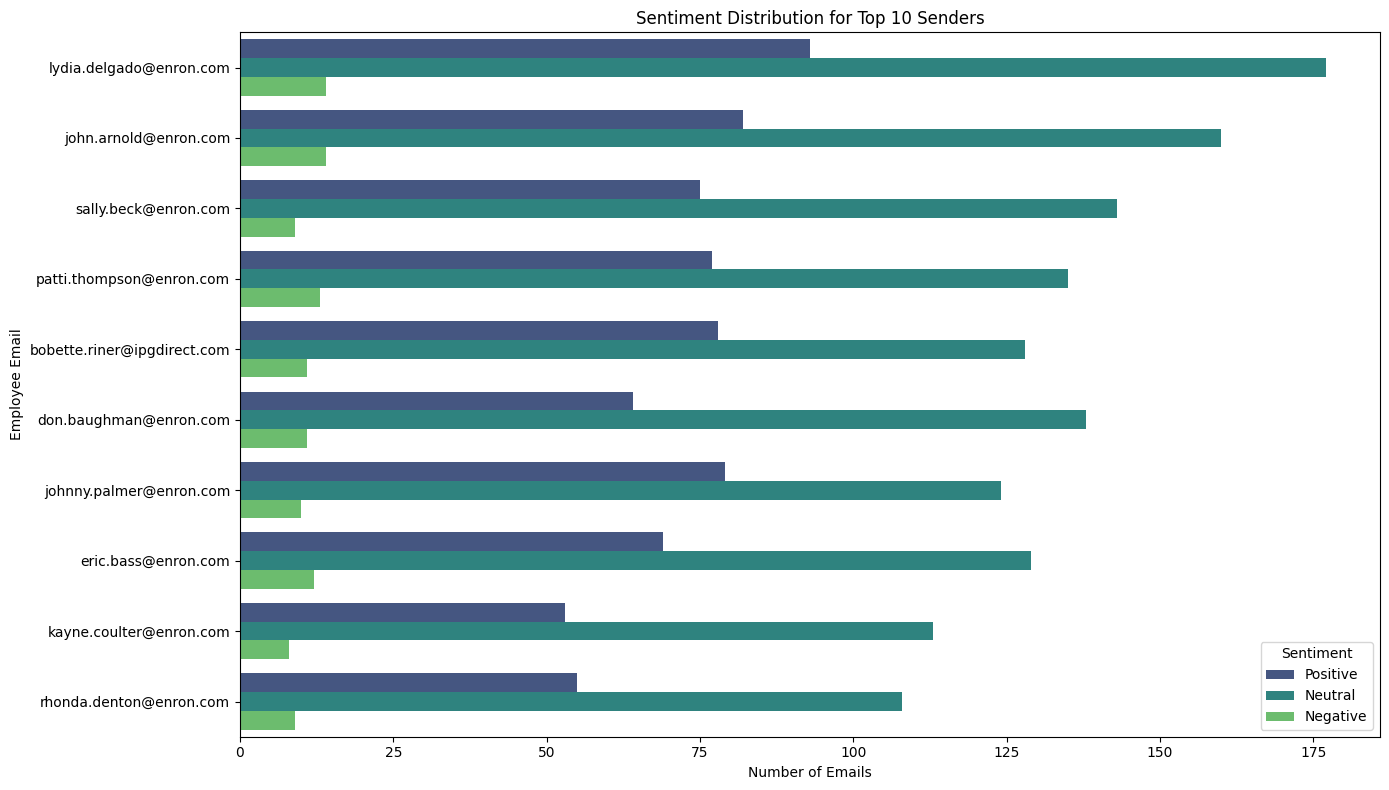

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 0. Setup Output Directory ---
output_dir = 'visualizations'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# Load the labeled dataset
df = pd.read_csv('test_with_sentiments.csv')

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# --- 1. Examine Overall Data Structure ---
print("\n## 1. Data Structure Examination ##")
df.info()
print("\nSummary Statistics:")
print(df.describe(include='all'))
print("-" * 50)

# --- 2. Investigate Sentiment Distribution ---
print("\n## 2. Sentiment Distribution Analysis ##")
sentiment_dist = df['sentiment'].value_counts(normalize=True) * 100
print(sentiment_dist)

# Visualization: Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_dist.index, y=sentiment_dist.values, palette='viridis', order=['Positive', 'Neutral', 'Negative'])
plt.title('Overall Distribution of Email Sentiment')
plt.ylabel('Percentage (%)')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.savefig(f'{output_dir}/sentiment_distribution.png') # Corrected path
print(f"\n-> Saved '{output_dir}/sentiment_distribution.png'")

# --- 3. Analyze Trends Over Time ---
print("\n## 3. Temporal Trend Analysis ##")
df_time_indexed = df.set_index('date')

# Visualization: Email Volume Over Time
plt.figure(figsize=(12, 6))
df_time_indexed['sentiment'].resample('M').count().plot(kind='line', marker='o')
plt.title('Total Email Volume Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Emails')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{output_dir}/email_volume_over_time.png') # Corrected path
print(f"-> Saved '{output_dir}/email_volume_over_time.png'")

# Visualization: Sentiment Trends Over Time
sentiment_over_time = df_time_indexed.groupby([pd.Grouper(freq='M'), 'sentiment']).size().unstack(fill_value=0)
sentiment_over_time.plot(kind='line', figsize=(12, 7), marker='o')
plt.title('Monthly Email Volume by Sentiment')
plt.ylabel('Number of Emails')
plt.xlabel('Month')
plt.grid(True)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig(f'{output_dir}/sentiment_trends_over_time.png') # Corrected path
print(f"-> Saved '{output_dir}/sentiment_trends_over_time.png'")
print("-" * 50)

# --- 4. Explore Additional Patterns (Top Senders) ---
print("\n## 4. Analysis of Top Senders ##")
top_10_senders = df['from'].value_counts().head(10)
print(top_10_senders)

# Visualization: Top 10 Senders
plt.figure(figsize=(12, 7))
sns.barplot(y=top_10_senders.index, x=top_10_senders.values, palette='mako', orient='h')
plt.title('Top 10 Employees by Email Volume')
plt.xlabel('Number of Emails Sent')
plt.ylabel('Employee Email')
plt.tight_layout()
plt.savefig(f'{output_dir}/top_senders.png') # Corrected path
print(f"\n-> Saved '{output_dir}/top_senders.png'")

# Visualization: Sentiment Distribution for Top Senders
top_sender_emails = df[df['from'].isin(top_10_senders.index)]
plt.figure(figsize=(14, 8))
sns.countplot(y='from', hue='sentiment', data=top_sender_emails, order=top_10_senders.index, palette='viridis', hue_order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution for Top 10 Senders')
plt.xlabel('Number of Emails')
plt.ylabel('Employee Email')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig(f'{output_dir}/top_senders_sentiment.png') # Corrected path
print(f"-> Saved '{output_dir}/top_senders_sentiment.png'")
print("-" * 50)

# Show all plots at the end
plt.show()